# Task 1: Feature Engineering and Transformation
This notebook demonstrates the feature engineering, scaling, and handling of class imbalance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.data_preprocessing import load_data, clean_data, feature_engineer_fraud, transform_data, handle_imbalance

In [2]:
fraud_path = '../data/raw/Fraud_Data.csv'
ip_path = '../data/raw/IpAddress_to_Country.csv'
credit_path = '../data/raw/creditcard.csv'

fraud_df, ip_df, credit_df = load_data(fraud_path, ip_path, credit_path)
fraud_df = clean_data(fraud_df)
fraud_df = feature_engineer_fraud(fraud_df, ip_df)

## 1. Feature Engineering Distribution
Checking the new features like `device_id_count` and `ip_address_count`.

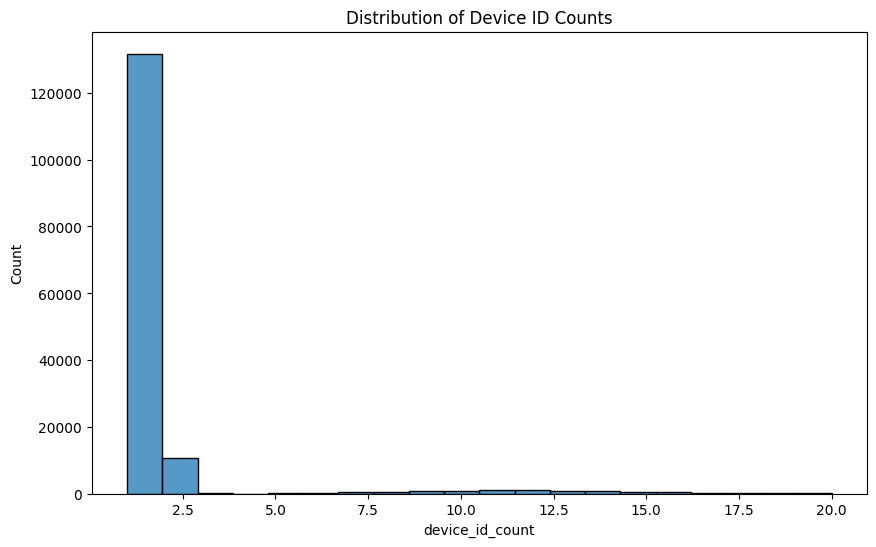

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['device_id_count'], bins=20)
plt.title('Distribution of Device ID Counts')
plt.show()

## 2. Data Transformation
Scaling numerical and encoding categorical features.

In [4]:
num_cols = ['purchase_value', 'age', 'hour_of_day', 'time_since_signup', 'device_id_count', 'ip_address_count']
cat_cols = ['source', 'browser', 'sex']

transformed_df, preprocessor = transform_data(fraud_df, cat_cols, num_cols)
print(f"Transformed shape: {transformed_df.shape}")
transformed_df.head()

Transformed shape: (151112, 27)


,purchase_value,age,hour_of_day,time_since_signup,device_id_count,ip_address_count,source_Ads,source_Direct,source_SEO,browser_Chrome,...,signup_time,purchase_time,device_id,ip_address,class,ip_int,lower_bound_ip_address,upper_bound_ip_address,country,day_of_week
0,-0.160204,0.679914,-1.377455,-0.136057,-0.261514,-0.232151,0.0,0.0,1.0,1.0,...,2015-02-24 22:55:49,2015-04-18 02:47:11,QVPSPJUOCKZAR,732758368.79972,0,NaN,NaN,NaN,Unknown,5
1,-1.142592,2.304476,-1.522122,-1.571877,-0.261514,-0.232151,1.0,0.0,0.0,1.0,...,2015-06-07 20:39:50,2015-06-08 01:38:54,EOGFQPIZPYXFZ,350311387.865908,0,NaN,NaN,NaN,Unknown,0
2,-1.197169,2.304476,0.937208,-1.577617,3.941861,4.00476,0.0,0.0,1.0,0.0,...,2015-01-01 18:52:44,2015-01-01 18:52:45,YSSKYOSJHPPLJ,2621473820.11095,1,NaN,NaN,NaN,Unknown,3
3,0.385567,0.911994,0.213876,-1.420213,-0.261514,-0.232151,0.0,0.0,1.0,0.0,...,2015-04-28 21:13:25,2015-05-04 13:54:50,ATGTXKYKUDUQN,3840542443.91396,0,NaN,NaN,NaN,Unknown,0
4,0.112681,1.376155,0.937208,-0.182509,-0.261514,-0.232151,1.0,0.0,0.0,0.0,...,2015-07-21 07:09:52,2015-09-09 18:40:53,NAUITBZFJKHWW,415583117.452712,0,NaN,NaN,NaN,Unknown,2


## 3. Handling Class Imbalance
Comparing class distribution before and after SMOTE.

In [7]:
X = transformed_df.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class', 'country', 'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'day_of_week'], axis=1, errors='ignore')
X = X[X.columns[X.columns.isin(transformed_df.columns)]] # ensure only transformed cols
# Actually transform_data returns all cols. Let's fix that in logic if needed.

y = fraud_df['class']

print("Before SMOTE:")
print(y.value_counts())

X_res, y_res = handle_imbalance(X, y, strategy='smote')

print("\nAfter SMOTE:")
print(pd.Series(y_res).value_counts())

Before SMOTE:
class
0    136961
1     14151
Name: count, dtype: int64

After SMOTE:
class
0    136961
1    136961
Name: count, dtype: int64
